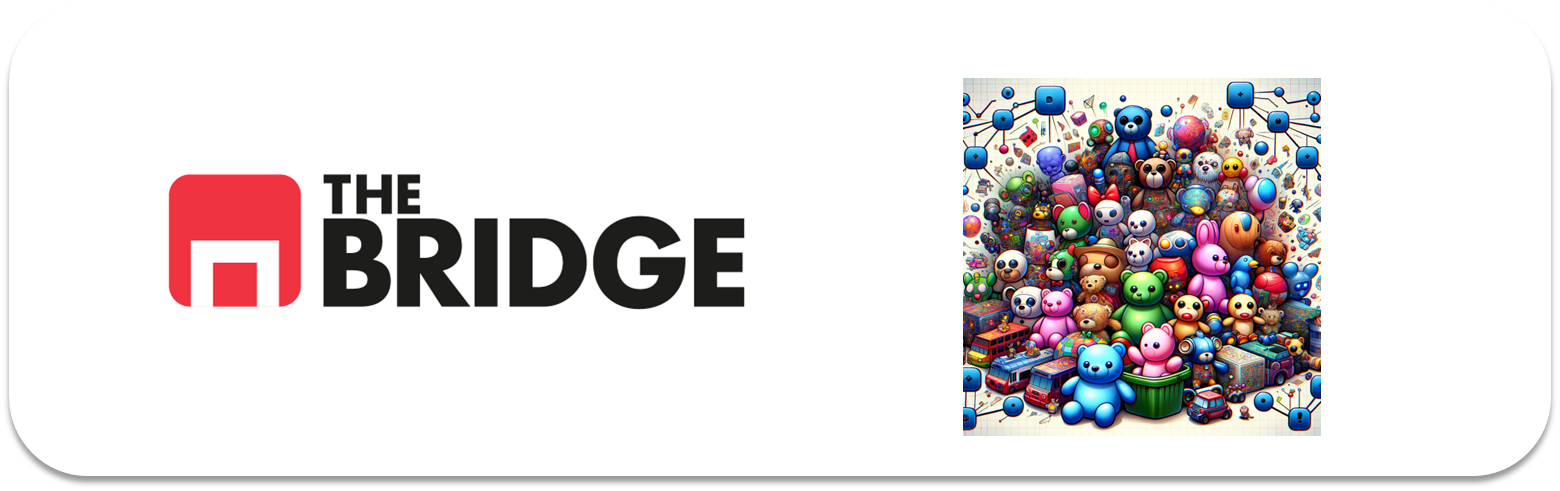

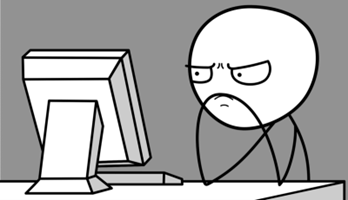

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [4]:
df = pd.read_csv('./data/empowering_drinks.csv', sep = '|')
df

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [6]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


Los datos estan bastante limpios, no veo valores nulos, y veo que los datos ya se encuentran estandarizados con las media entre 0 y 1

In [7]:
pd.DataFrame({"Cardinalidad": df.nunique(), "% Vari Card": df.nunique()/df.count()*100.0})

,Cardinalidad,% Vari Card
Azúcares,111,72.549020
Vitamínas del grupo B,75,49.019608
Cafeína,121,79.084967
Ácido Cítrico,112,73.202614
Taurina,119,77.777778


In [ ]:
train_set = df
features = df.columns.to_list()

(5, 2)


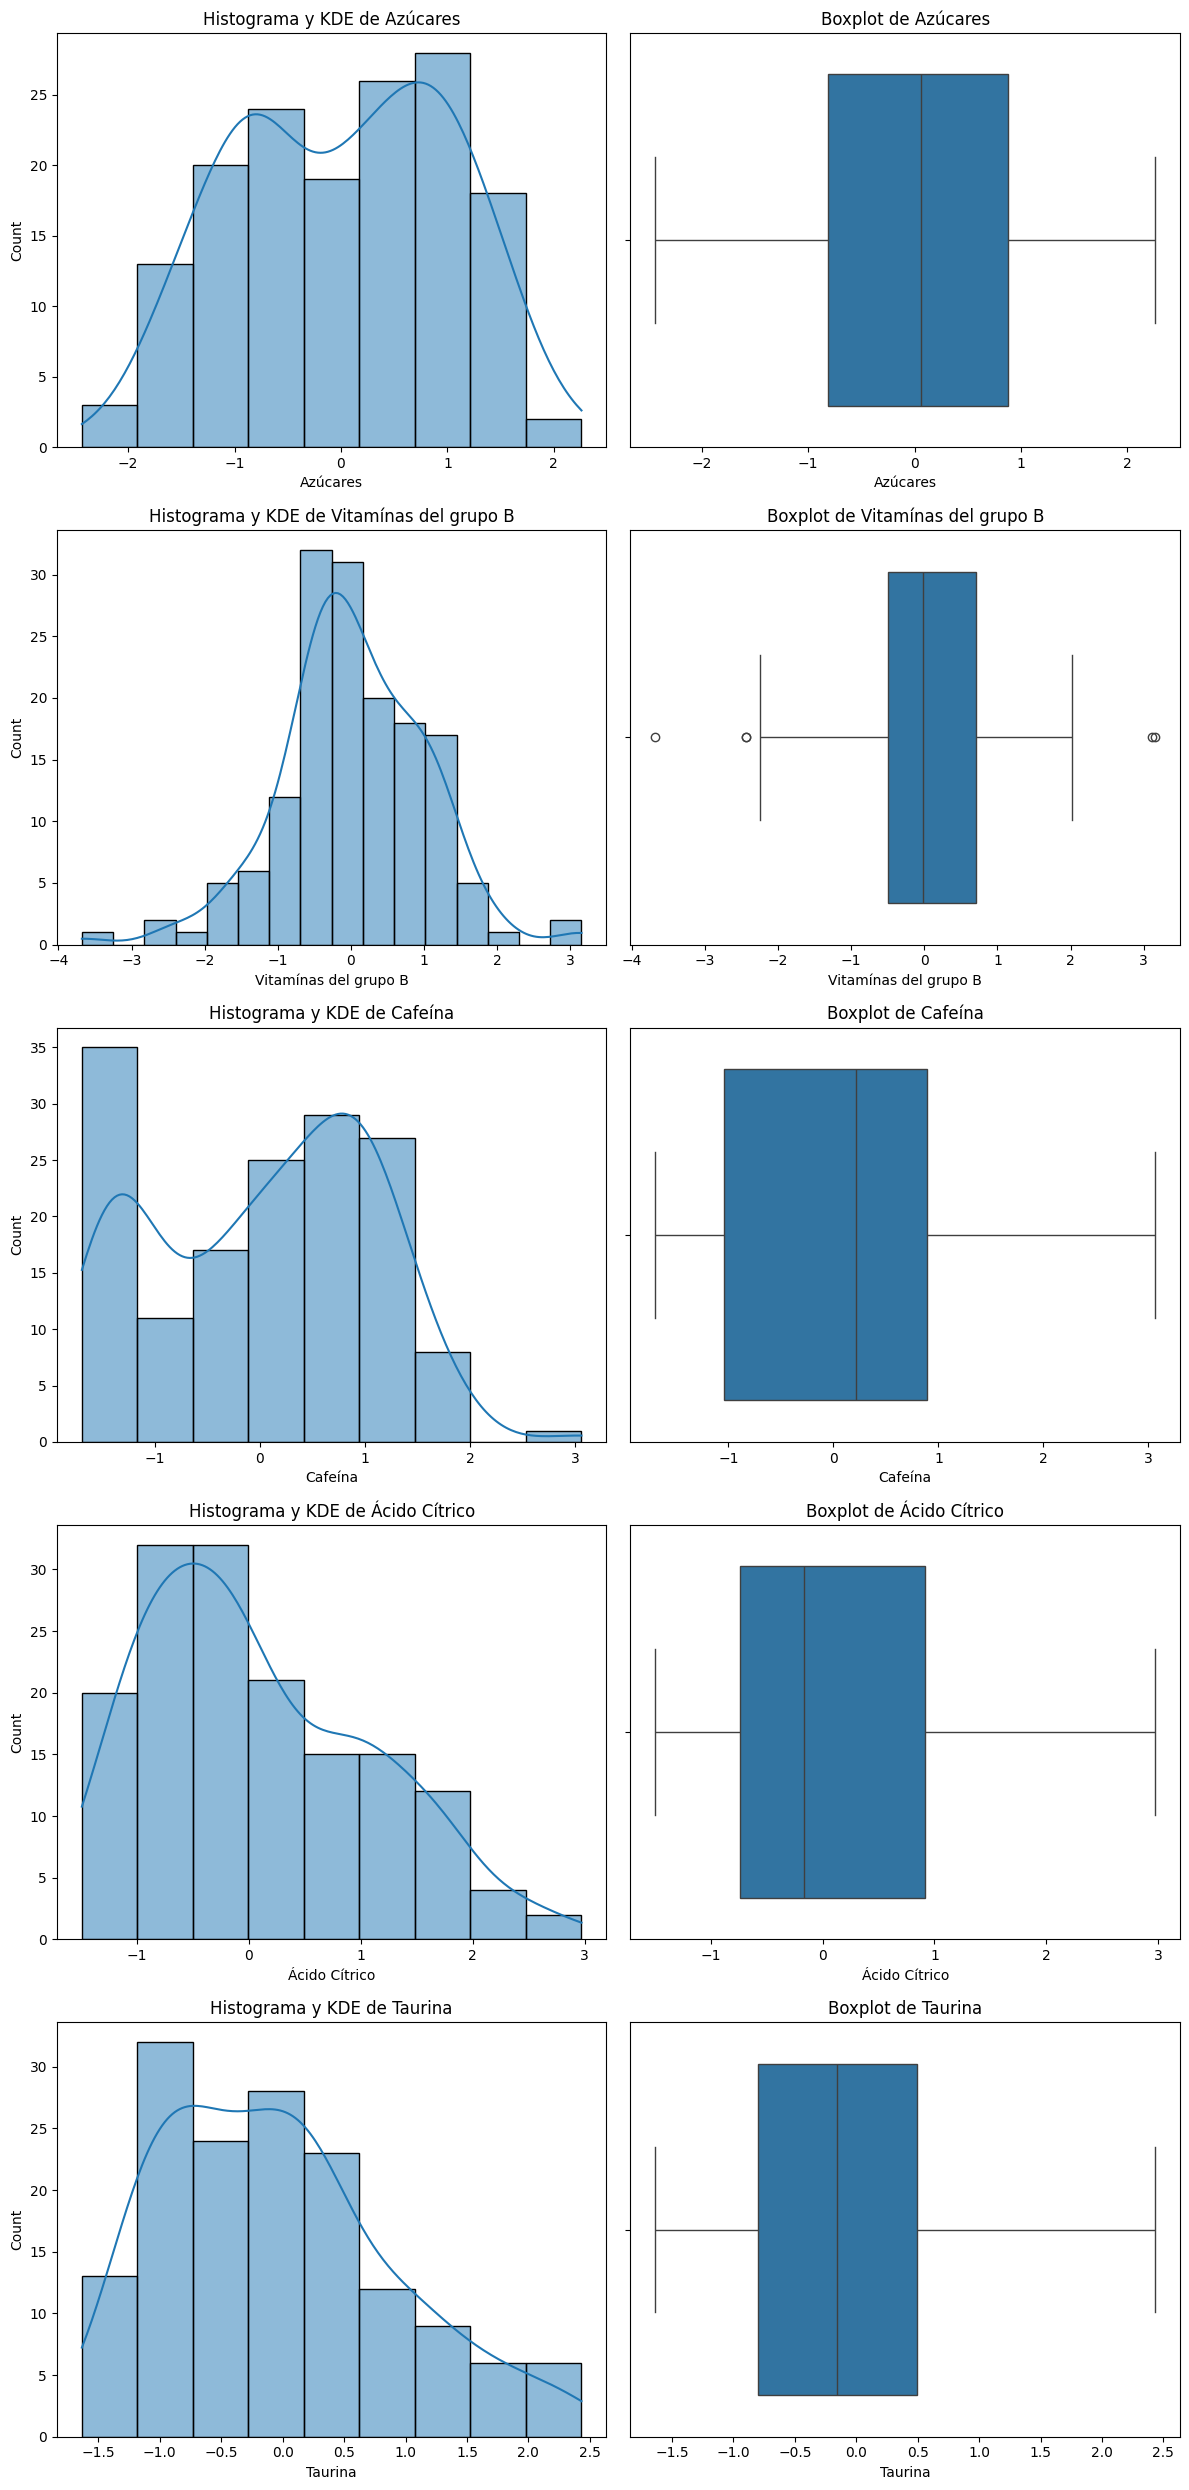

In [ ]:
#Visualizo graficamente las variables 

import bootcampviztools as bt
bt.plot_combined_graphs(train_set, features)

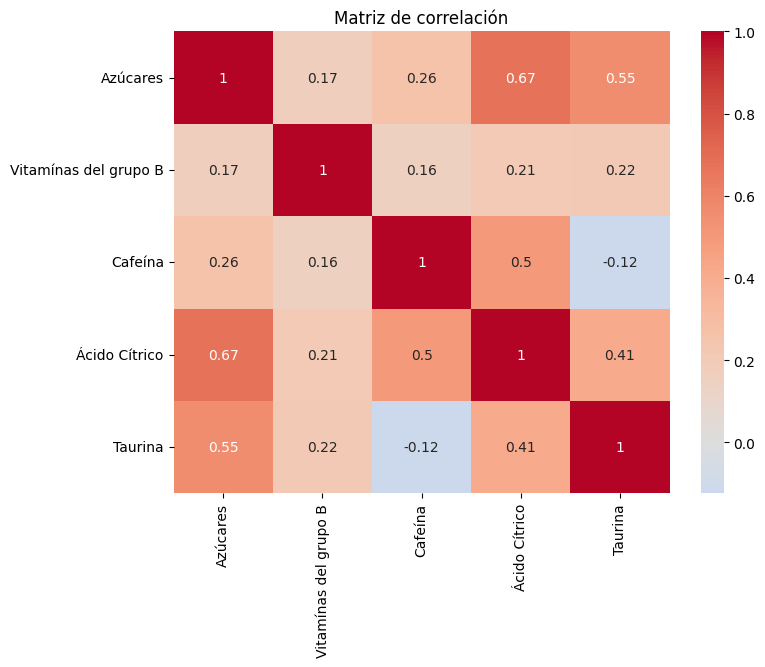

In [26]:
#Analizo su correlacion para ver si puedo prescindir de alguna de ellas.
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

Vitaminas del grupo B está débilmente correlacionada con todo (máx. 0.21).

Cafeína y Taurina tienen una ligera correlación negativa (-0.12)

Decido quedarme con todas las variables

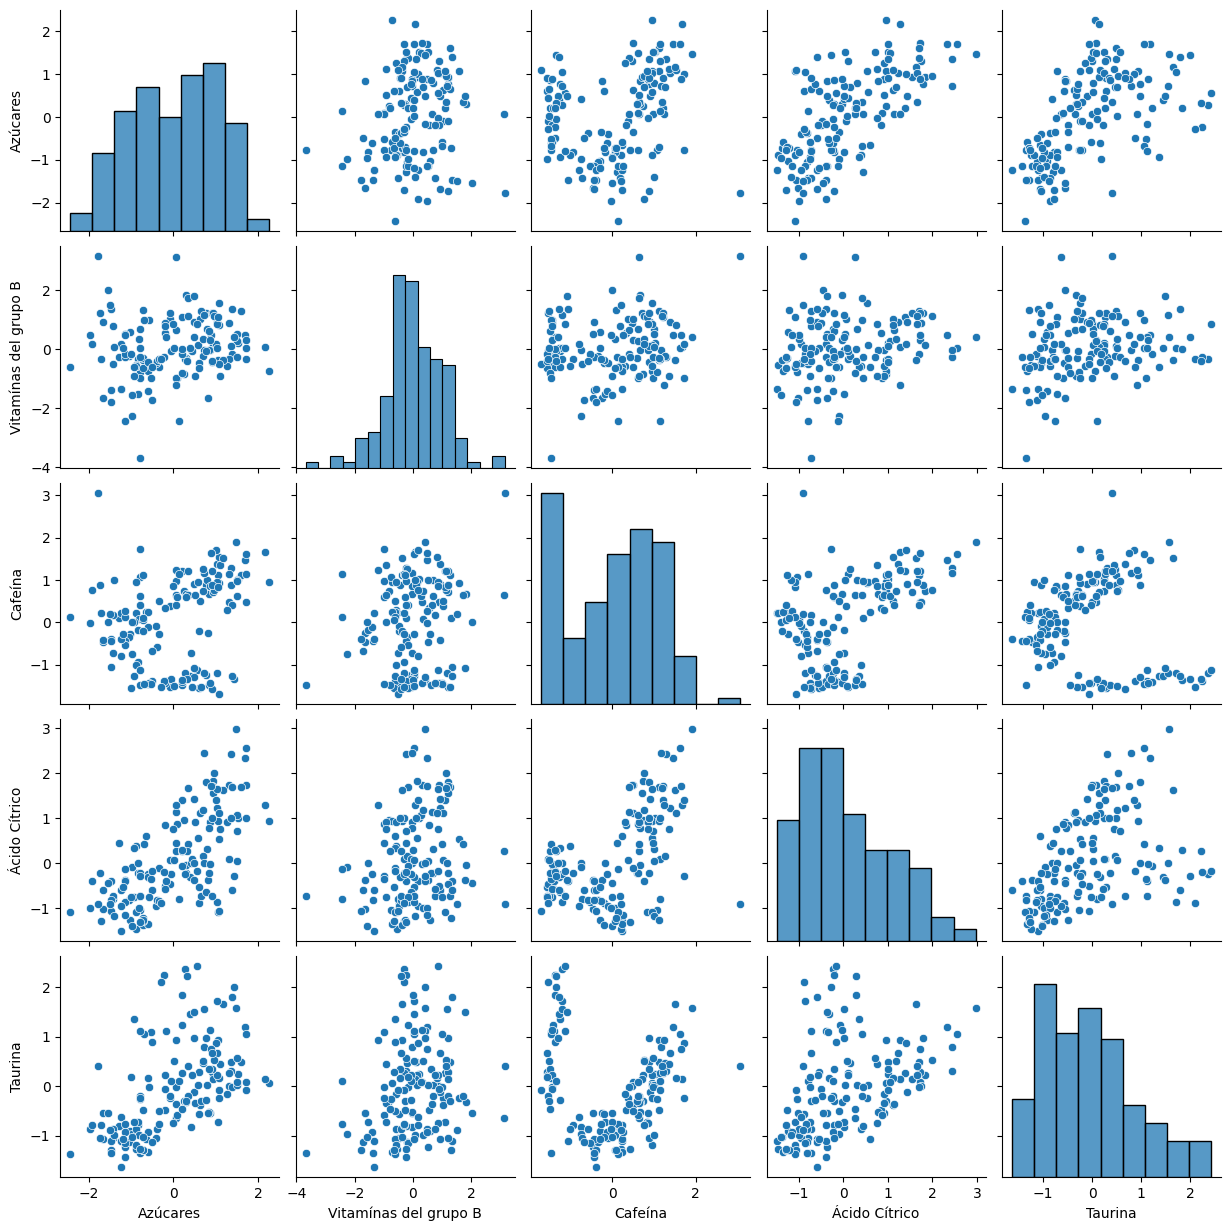

In [29]:
#Intento detectar posibles agrupaciones

sns.pairplot(train_set[features])

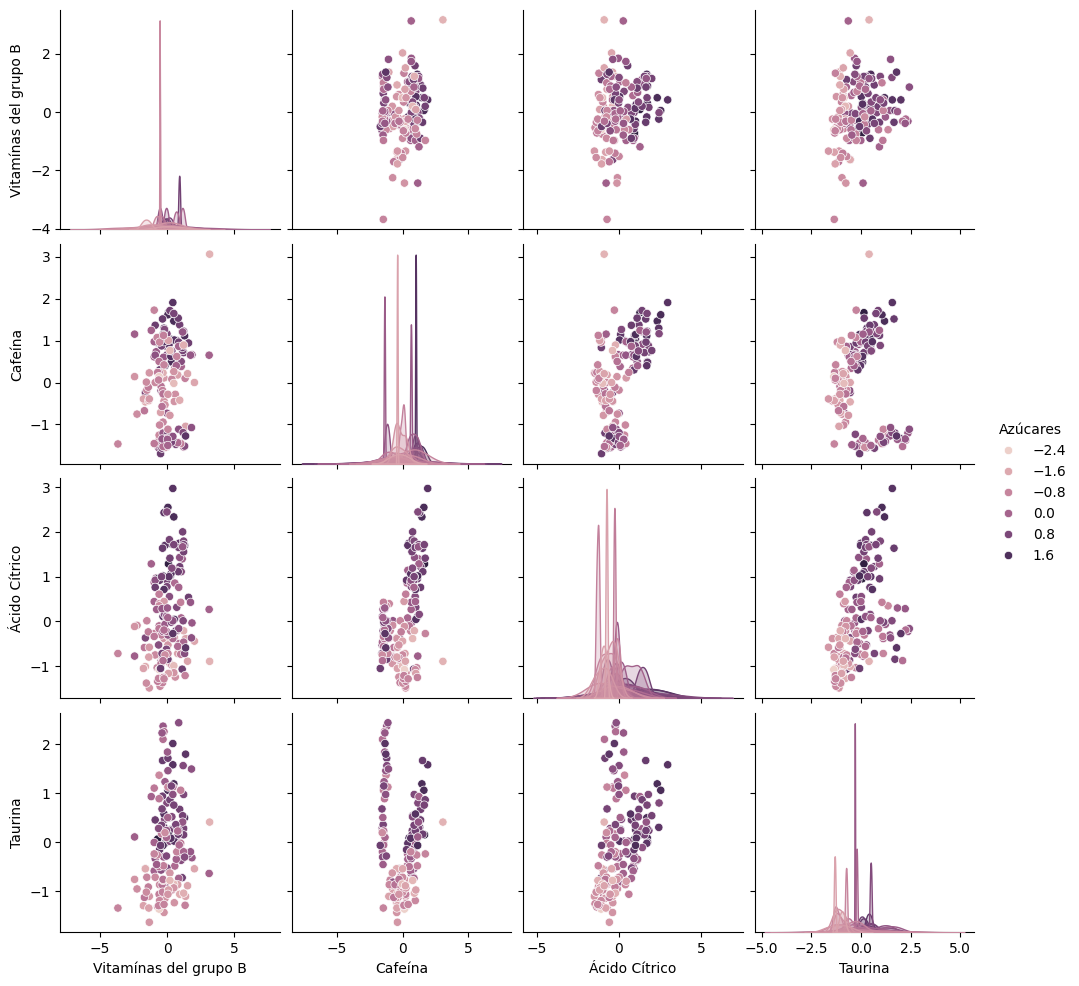

In [ ]:
#Veo claras divisiones y algunas no tan claras

sns.pairplot(train_set[features], hue = "Azúcares")

In [39]:
from sklearn.cluster import DBSCAN

#Busco Eps y anomalias

outlier_percent = []

for eps in np.linspace(0.001,3,50): 
    
    # Creamos el modelo
    dbscan = DBSCAN(eps=eps,min_samples=2*df.shape[1]) 
    dbscan.fit(train_set)
   
     
    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

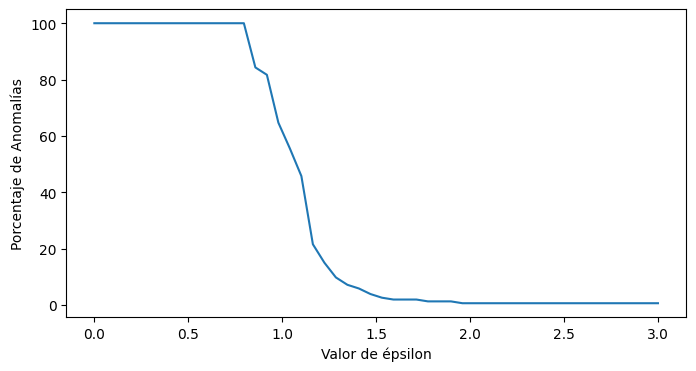

In [40]:

plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()

In [49]:
#Analizo el porcentaje de anomalias para los eps encontrados entre 1.2 y 2.1

for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 1.20 <= val <= 2.1]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 1.2250816326530611: 15.032679738562091% de anomalías
Para 1.2862857142857143: 9.803921568627452% de anomalías
Para 1.3474897959183672: 7.189542483660131% de anomalías
Para 1.4086938775510203: 5.882352941176471% de anomalías
Para 1.4698979591836734: 3.9215686274509802% de anomalías
Para 1.5311020408163265: 2.6143790849673203% de anomalías
Para 1.5923061224489796: 1.9607843137254901% de anomalías
Para 1.6535102040816325: 1.9607843137254901% de anomalías
Para 1.7147142857142856: 1.9607843137254901% de anomalías
Para 1.7759183673469388: 1.3071895424836601% de anomalías
Para 1.8371224489795916: 1.3071895424836601% de anomalías
Para 1.8983265306122448: 1.3071895424836601% de anomalías
Para 1.9595306122448979: 0.6535947712418301% de anomalías
Para 2.020734693877551: 0.6535947712418301% de anomalías
Para 2.081938775510204: 0.6535947712418301% de anomalías


A partir de 1.22 la curva comienza a realentizarse. Me quedo con eps = 1.34, que nos da un 7% de anomalias, y 4 segmentos, 1 outlier y 3 aceptables

In [115]:
dbscan = DBSCAN(eps = 1.34)
dbscan.fit(df)

DBSCAN(eps=1.34)

In [116]:
dbscan.min_samples

5

In [117]:
#Analizo las etiquetas generadas

df['Labels'] = dbscan.labels_
df['Labels'].value_counts()

Labels
 0    59
 1    45
 2    33
-1    16
Name: count, dtype: int64

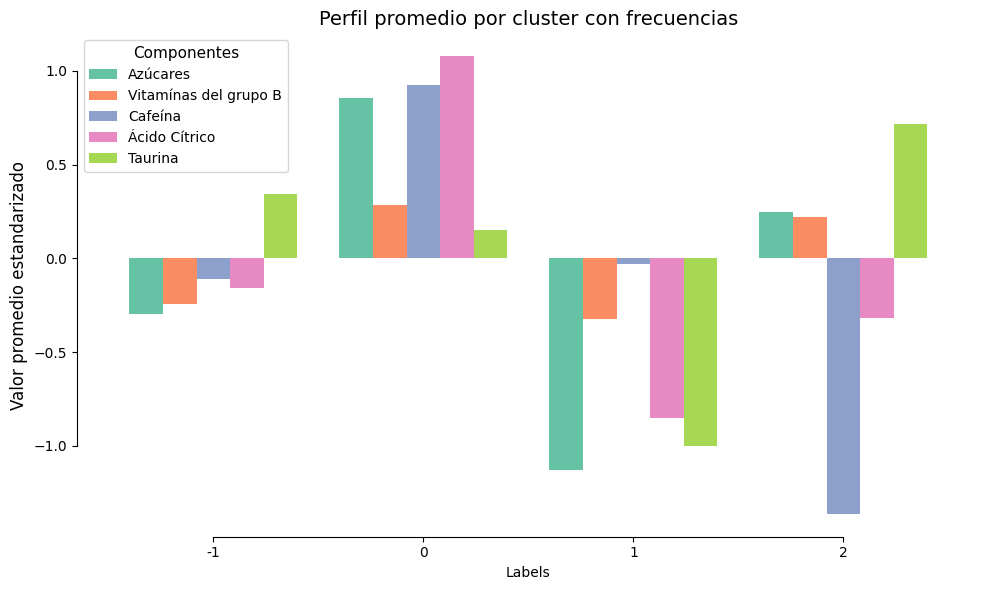

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular medias por cluster y frecuencias
cluster_means = df.groupby('Labels').mean(numeric_only=True)
cluster_means['Freq'] = df['Labels'].value_counts().sort_index()

# Variables a graficar (excluyendo 'Freq')
variables = cluster_means.columns[:-1]

# Colores fijos para variables
palette = sns.color_palette("Set2", len(variables))

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar barras para cada variable (columna)
cluster_means[variables].plot(kind='bar', ax=ax, color=palette, width=0.8)

ax.set_ylabel('Valor promedio estandarizado', fontsize=12)
ax.set_title('Perfil promedio por cluster con frecuencias', fontsize=14)

# Mejorar leyenda
ax.legend(title='Componentes', fontsize=10, title_fontsize=11, loc='upper left')

# Ajustar estética
sns.despine(trim=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [145]:
cluster_means

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Freq
Labels,,,,,,
-1,-0.297227,-0.245426,-0.110958,-0.159681,0.343097,16
0,0.855129,0.284714,0.923532,1.078750,0.153472,59
1,-1.131168,-0.321122,-0.032063,-0.850203,-1.000141,45
2,0.246906,0.220667,-1.363286,-0.320876,0.718682,33


A primeras luego de realizar el DBSCAN podemos observar 3 segmentos definidos:

Cluster 0 tiene valores positivos altos en Azúcares, Cafeína y Ácido Cítrico - Podrían categorizar como bebidas estimulantes

Cluster 1 valores negativos o bajos en casi todo - podrían ser para bebidas más suaves o menos energéticas.

Cluster 2 valores mixtos, con alto en Taurina pero bajo en Cafeína - distinto perfil, bebidas a base de Taurina. 

Outliers (-1): grupo pequeño

A ver que resultados obtego con KMeans....

In [149]:
train_set = train_set.drop('Labels', axis=1)

In [152]:
from sklearn.cluster import KMeans


#Voy a probar diferentes valores de k segun su inertia y codo 
ks = []
inertias = []

for k in range(1, 10):
    clustering = KMeans(n_clusters = k)
    clustering.fit(train_set)
    inertias.append(clustering.inertia_)
    ks.append(k)

In [153]:
# Dataframe con las inercias
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertias})
df_inertias

,k,inertia
0,1,763.139363
1,2,607.848939
2,3,329.261416
3,4,278.978204
4,5,254.252759
5,6,231.320018
6,7,204.134692
7,8,193.354010
8,9,183.750936


In [154]:
# Observamos qué tanto varían las inercias de una k a otra
df_inertias['diff'] = df_inertias['inertia'] - df_inertias['inertia'].shift(1)
df_inertias

,k,inertia,diff
0,1,763.139363,NaN
1,2,607.848939,-155.290424
2,3,329.261416,-278.587523
3,4,278.978204,-50.283212
4,5,254.252759,-24.725446
5,6,231.320018,-22.932741
6,7,204.134692,-27.185326
7,8,193.354010,-10.780682
8,9,183.750936,-9.603074


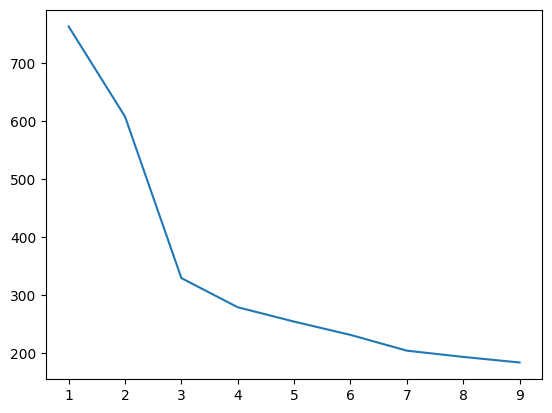

In [155]:
plt.plot(ks, inertias);

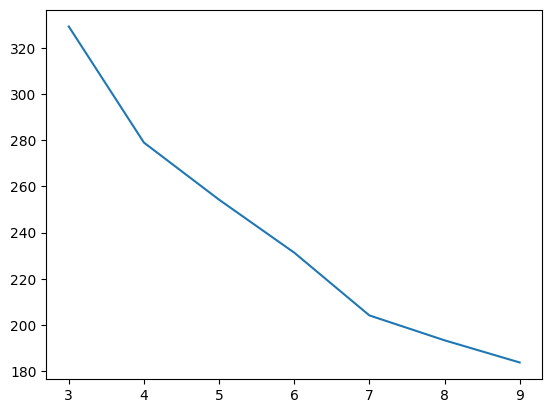

In [162]:
#Plot de inercias sin el cambio de 1 grupo a dos grupos
plt.plot(ks[2::], inertias[2::]);

Observo que se produce un cambio pronunciado entre k=1 y k=2 pero el mayor cambio se produce entre k=2 y k=3 y luego se observa tambien un cambio pronunciado entre k=3 y k=4 que es donde presiento que podria estar el codo. Analizare con el silhouette score. 

In [167]:
from sklearn.metrics import silhouette_score, silhouette_samples

#Calculo el silhouette score para cada k
ks = []
sil_scores = []

for k in range(2, 10): 
    clustering = KMeans(n_clusters = k)
    clustering.fit(train_set)

    sil_scores.append(silhouette_score(train_set, clustering.labels_))
    ks.append(k)

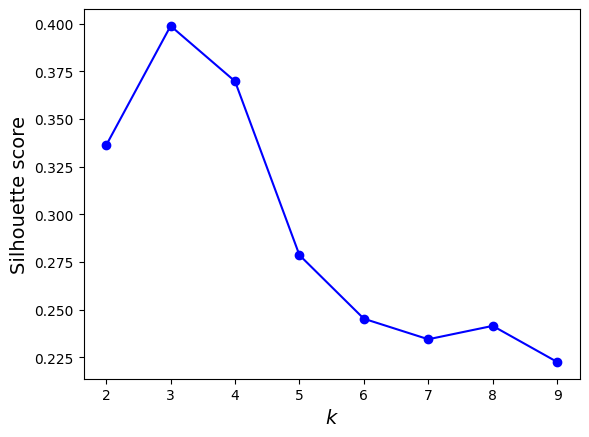

In [168]:
# Grafo el silhouette score para cada k
plt.plot(ks, sil_scores, "bo-");
plt.xlabel("$k$", fontsize=14);
plt.ylabel("Silhouette score", fontsize=14);

Al momento me quedo con k=3, reforzare con el diagrama de silueta. 

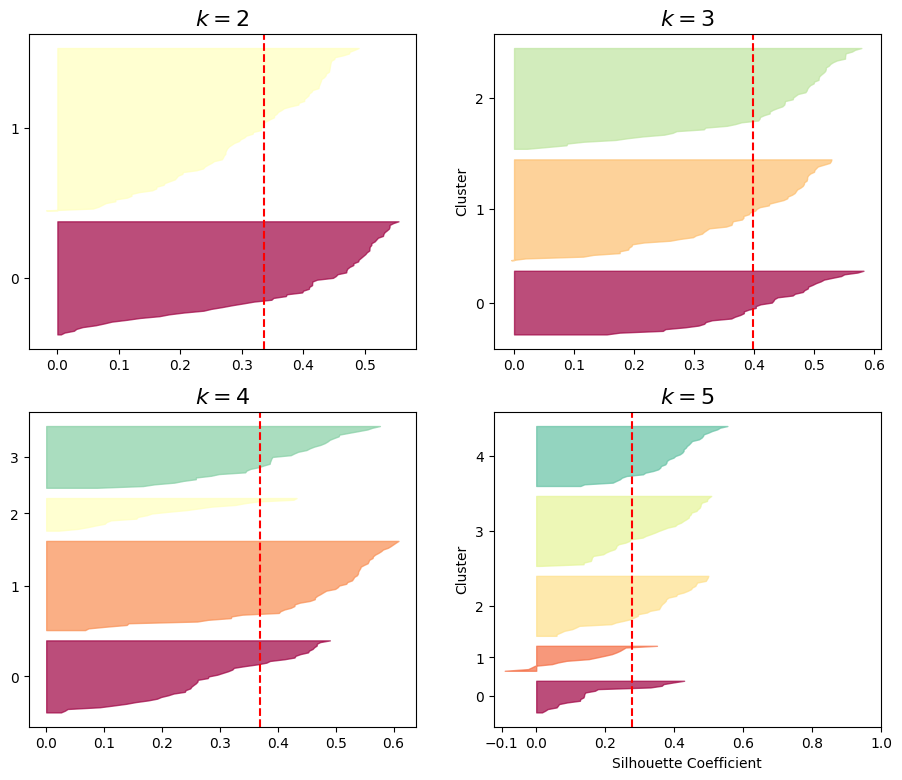

In [172]:
import matplotlib
from matplotlib.ticker import FixedLocator, FixedFormatter

'''
La anchura de cada cuchillo representa el numero de muestras por cluster. Están ordenadas
por su coeficiente de silhouette, por eso tiene esa forma de cuchillo. Cuanta más caida tenga
indica que las muestras tienen un coeficiente mas disperso en ese cluster
Deberian estar todos los clusters por encima de la media.
Hay algunas lineas hacia la izda xq es el coeficiente negativo. Puntos asignados al cluster erroneo.
'''
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    clustering = KMeans(n_clusters = k)
    clustering.fit(train_set)
    y_pred = clustering.labels_
    silhouette_coefficients = silhouette_samples(train_set, y_pred)

    padding = len(train_set) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=sil_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

Me quedo con k=3, veo tres grupos medianamente uniformes bien definidos que pasan la linea punteada, observo que hay unos pequeños valores negativos para el cluster 1

In [173]:
#KMeans con k = 3
clustering_k3 = KMeans(n_clusters= 3)
clustering_k3.fit(train_set)

KMeans(n_clusters=3)

In [174]:
train_set['cluster'] = clustering_k3.predict(train_set)
train_set.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster
0,1.518613,0.232053,1.034819,1.013009,0.251717,1
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,1
3,1.691550,0.487926,1.466525,2.334574,1.186068,1
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,1


In [175]:
# Cuantos elementos hay en cada cluster
train_set['cluster'].value_counts(normalize= True)

cluster
1    0.379085
0    0.379085
2    0.241830
Name: proportion, dtype: float64

Agrupo bastante bien..

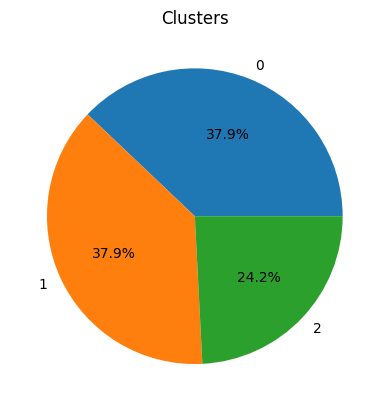

In [177]:
# Graficamos la cantidad de elementos en cada cluster
plt.pie(train_set['cluster'].value_counts(normalize= True), autopct= '%1.1f%%', labels= ['0', '1', '2'])
plt.title('Clusters');

In [180]:
train_set.groupby('cluster').describe().T

cluster                              0          1          2
Azúcares              count  58.000000  58.000000  37.000000
                      mean   -0.947445   0.874784   0.193422
                      std     0.614542   0.673565   0.643357
                      min    -2.434235  -1.779545  -0.988975
                      25%    -1.368819   0.487166  -0.223111
                      50%    -0.945741   0.931862   0.209232
                      75%    -0.717217   1.345675   0.641574
                      max     0.826864   2.259772   1.432144
Vitamínas del grupo B count  58.000000  58.000000  37.000000
                      mean   -0.441034   0.417971   0.190284
                      std     1.064408   0.902109   0.692710
                      min    -3.679162  -1.193530  -0.974210
                      25%    -0.955933  -0.234003  -0.316249
                      50%    -0.371079   0.323436   0.039106
                      75%     0.168084   1.008812   0.780354
                      max     2.023170   3.156325   1.803849
Cafeína               count  58.000000  58.000000  37.000000
                      mean   -0.018308   1.008681  -1.382700
                      std     0.620700   0.467820   0.144322
                      min    -1.465058   0.301923  -1.695971
                      25%    -0.428463   0.675901  -1.485138
                      50%    -0.009306   0.954502  -1.404820
                      75%     0.239175   1.223063  -1.274305
                      max     1.727556   3.062832  -1.073511
Ácido Cítrico         count  58.000000  58.000000  37.000000
                      mean   -0.699755   1.103987  -0.302761
                      std     0.498937   0.772327   0.379891
                      min    -1.493188  -1.072834  -1.056912
                      25%    -1.076019   0.758249  -0.595160
                      50%    -0.794191   1.036893  -0.308556
                      75%    -0.372246   1.661850  -0.021952
                      max     0.605394   2.971473   0.423878
Taurina               count  58.000000  58.000000  37.000000
                      mean   -0.912493   0.201002   0.933003
                      std     0.343960   0.541053   0.861753
                      min    -1.634288  -0.738868  -0.457698
                      25%    -1.128181  -0.187342   0.191157
                      50%    -0.944339   0.154389   1.056297
                      75%    -0.760497   0.493956   1.558078
                      max     0.104643   1.661895   2.431870

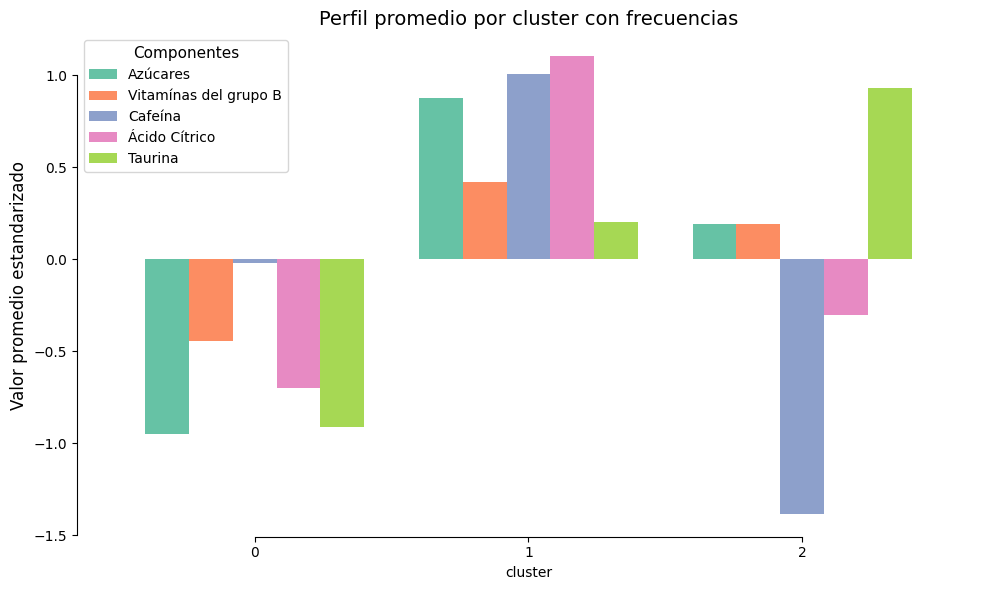

In [182]:
# Calcular medias por cluster y frecuencias
k_means = train_set.groupby('cluster').mean(numeric_only=True)
k_means['Freq'] = train_set['cluster'].value_counts().sort_index()

# Variables a graficar (excluyendo 'Freq')
variables = k_means.columns[:-1]

# Colores fijos para variables
palette = sns.color_palette("Set2", len(variables))

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar barras para cada variable (columna)
k_means[variables].plot(kind='bar', ax=ax, color=palette, width=0.8)

ax.set_ylabel('Valor promedio estandarizado', fontsize=12)
ax.set_title('Perfil promedio por cluster con frecuencias', fontsize=14)

# Mejorar leyenda
ax.legend(title='Componentes', fontsize=10, title_fontsize=11, loc='upper left')

# Ajustar estética
sns.despine(trim=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [183]:
k_means

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Freq
cluster,,,,,,
0,-0.947445,-0.441034,-0.018308,-0.699755,-0.912493,58
1,0.874784,0.417971,1.008681,1.103987,0.201002,58
2,0.193422,0.190284,-1.382700,-0.302761,0.933003,37


Puedo observar con Kmeans 3 clusters bien diferenciados:

Cluster 0: Podría representar bebidas suaves o "light", con bajos niveles en casi todo.

Cluster 1: Parece agrupar bebidas "energéticas estándar" o intensas.

Cluster 2: Bebidas con alta taurina y azúcar media, pero muy baja cafeína: una categoría interesante que KMeans logró separar bien y DBSCAN no tanto.

In [188]:
cluster_map = {0: 'Light', 1: 'Energy', 2: 'Low Caffeine'}

In [189]:
train_set['Label'] = train_set['cluster'].map(cluster_map)
train_set.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster,Label
0,1.518613,0.232053,1.034819,1.013009,0.251717,1,Energy
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,1,Energy
2,0.196879,1.109334,1.215533,1.395148,0.269020,1,Energy
3,1.691550,0.487926,1.466525,2.334574,1.186068,1,Energy
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,1,Energy


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [185]:
df_new = pd.read_csv('./data/new_experiments.csv', sep='|')
df_new

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [186]:
clustering_k3_new = KMeans(n_clusters= 3)
clustering_k3_new.fit(df_new)

KMeans(n_clusters=3)

In [187]:
df_new['cluster'] = clustering_k3_new.predict(df_new)
df_new.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster
0,1.481555,0.305159,1.366128,2.239039,0.731870,0
1,0.616869,0.890014,0.583034,0.312420,-0.665332,0
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,1
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,1
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,1


In [190]:
df_new['Label'] = df_new['cluster'].map(cluster_map)
df_new.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster,Label
0,1.481555,0.305159,1.366128,2.239039,0.731870,0,Light
1,0.616869,0.890014,0.583034,0.312420,-0.665332,0,Light
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,1,Energy
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,1,Energy
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,1,Energy


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.